In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [26]:
df_causes = pd.read_csv('data/cause.csv')
df_causes.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2755,55.5
1,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,439,63.1
2,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4010,54.2
3,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1604,51.8
4,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,California,13213,32.0


In [54]:
df_causes_group = df_causes.groupby(by=['Cause Name', 'Year'])['Deaths'].sum()

In [55]:
df_causes_group.head(30)

Cause Name           Year
All causes           1999    4782798
                     2000    4806702
                     2001    4832850
                     2002    4886774
                     2003    4896576
                     2004    4795230
                     2005    4896034
                     2006    4852528
                     2007    4847424
                     2008    4943968
                     2009    4874326
                     2010    4936870
                     2011    5030916
                     2012    5086558
                     2013    5193986
                     2014    5252836
                     2015    5425260
                     2016    5063723
Alzheimer's disease  1999      89072
                     2000      99116
                     2001     107704
                     2002     117732
                     2003     126914
                     2004     131930
                     2005     143198
                     2006     144864
            

In [6]:
# Plot the number of deaths from above (different line for each cause, x axis year, y axis deaths)
# Vertical lines sections highlighted around the recessions in the background

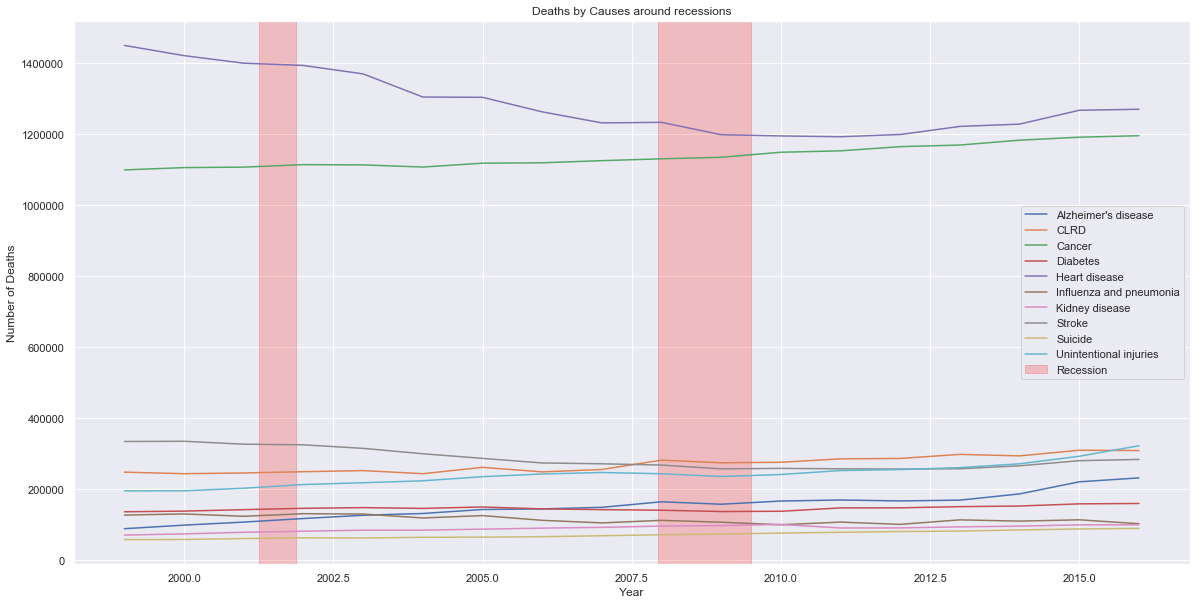

In [127]:
causes = []
plt.figure(figsize=(20, 10))
for cause in df_causes_group['Cause Name'].unique():
    if cause != 'All causes':
        data = df_causes_group.loc[df_causes_group['Cause Name']==cause,]
        plt.plot(data['Year'], data['Deaths'])
        causes.append(cause)
plt.axvspan(2001.25, 2001.87, alpha=0.2, color='red')
plt.axvspan(2007.94, 2009.5, alpha=0.2, color='red')
plt.legend(causes+['Recession'])

plt.title('Deaths by Causes around recessions')
plt.ylabel('Number of Deaths')
plt.xlabel('Year')
plt.show()

In [57]:
df_causes_group = df_causes_group.reset_index()
df_causes_group.head(50)

,index,Cause Name,Year,Deaths
0,0,All causes,1999,4782798
1,1,All causes,2000,4806702
2,2,All causes,2001,4832850
3,3,All causes,2002,4886774
4,4,All causes,2003,4896576
5,5,All causes,2004,4795230
6,6,All causes,2005,4896034
7,7,All causes,2006,4852528
8,8,All causes,2007,4847424
9,9,All causes,2008,4943968


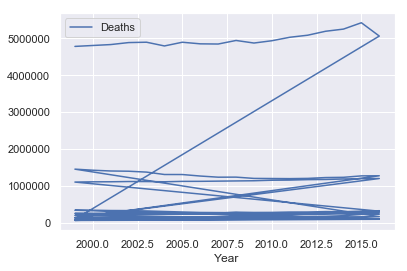

In [61]:
df_causes_group.set_index('Cause Name')
df_causes_group.plot(x='Year', y='Deaths')

In [60]:
df_causes_group.head(20)

,index,Cause Name,Year,Deaths
0,0,All causes,1999,4782798
1,1,All causes,2000,4806702
2,2,All causes,2001,4832850
3,3,All causes,2002,4886774
4,4,All causes,2003,4896576
5,5,All causes,2004,4795230
6,6,All causes,2005,4896034
7,7,All causes,2006,4852528
8,8,All causes,2007,4847424
9,9,All causes,2008,4943968


In [111]:
df_disparity = pd.read_csv('data/cleaned_income_dispersion.csv', index_col=0)
df_disparity['5th percentile limit'] = df_disparity['10th percentile limit']/2
df_disparity.head()

,10th percentile limit,20th percentile limit,40th percentile limit,50th (median),60th percentile limit,80th percentile limit,90th percentile limit,95th percentile limit,Year,5th percentile limit
0,14219,24638,47110,61372,77552,126855,179077,237034,2017,7109.5
1,13901,24518,46581,60309,76479,123621,174203,230095,2016,6950.5
2,13719,23591,45020,58476,74498,121060,167804,221900,2015,6859.5
3,12724,22213,42688,55613,70699,116355,163221,214100,2014,6362.0
4,12858,22134,43251,56479,70830,116186,163821,216208,2013,6429.0


Text(0,0.5,'Income (dollars)')

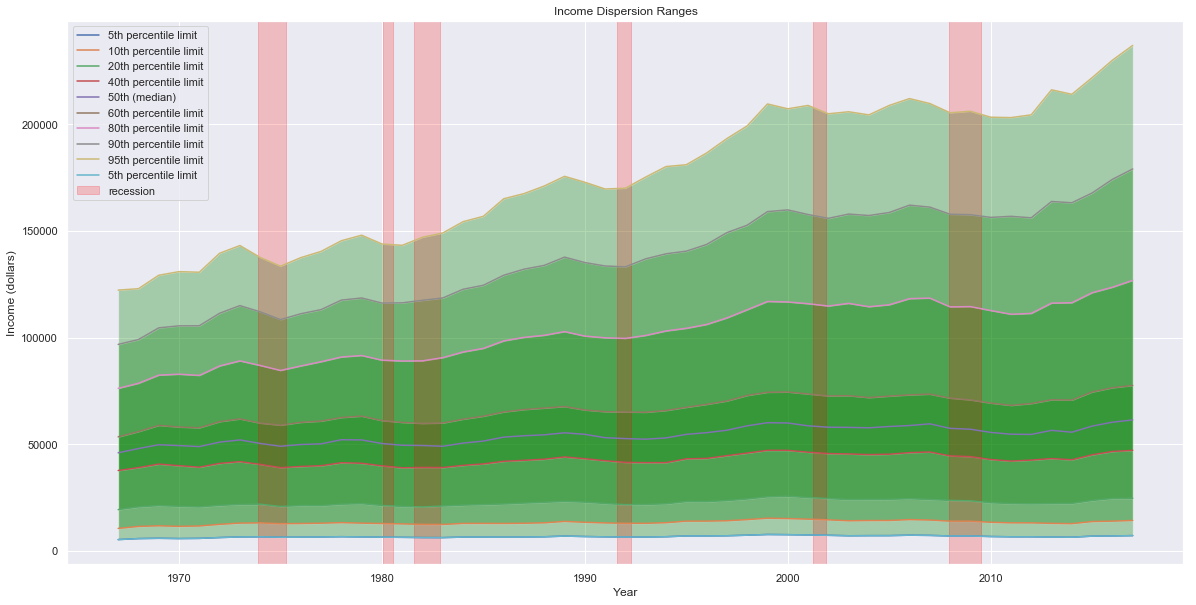

In [134]:
# Plot the line across time with a strong line the median and a fading area from that median
# x axis year, y axis disparity limit
# Vertical lines sections highlighted around the recessions in the background

plt.figure(figsize=(20,10))

cols = ['5th percentile limit','10th percentile limit', '20th percentile limit',
'40th percentile limit', '50th (median)', '60th percentile limit',
'80th percentile limit', '90th percentile limit',
'95th percentile limit', '5th percentile limit']

plt.fill_between(df_disparity['Year'], df_disparity['5th percentile limit'], df_disparity['95th percentile limit'], where=df_disparity['95th percentile limit'] >= df_disparity['5th percentile limit'], facecolor='green',alpha=0.3)
plt.fill_between(df_disparity['Year'], df_disparity['10th percentile limit'], df_disparity['90th percentile limit'], where=df_disparity['90th percentile limit'] >= df_disparity['10th percentile limit'], facecolor='green',alpha=0.3)
plt.fill_between(df_disparity['Year'], df_disparity['20th percentile limit'], df_disparity['80th percentile limit'], where=df_disparity['80th percentile limit'] >= df_disparity['20th percentile limit'], facecolor='green',alpha=0.3)
plt.fill_between(df_disparity['Year'], df_disparity['40th percentile limit'], df_disparity['60th percentile limit'], where=df_disparity['60th percentile limit'] >= df_disparity['40th percentile limit'], facecolor='green',alpha=0.3)

for col in cols:
    plt.plot(df_disparity['Year'], df_disparity[col])
    
plt.axvspan(1973.87, 1975.25, alpha=0.2, color='red')
plt.axvspan(1980.06, 1980.56, alpha=0.2, color='red')
plt.axvspan(1981.56, 1982.87, alpha=0.2, color='red')
plt.axvspan(1991.56, 1992.25, alpha=0.2, color='red')
plt.axvspan(2001.25, 2001.87, alpha=0.2, color='red')
plt.axvspan(2007.94, 2009.5, alpha=0.2, color='red')        

plt.legend(cols+['recession'])
plt.title('Income Dispersion Ranges')
plt.xlabel('Year')
plt.ylabel('Income (dollars)')



In [114]:
df_disparity.columns

Index(['10th percentile limit', '20th percentile limit',
       '40th percentile limit', '50th (median)', '60th percentile limit',
       '80th percentile limit', '90th percentile limit',
       '95th percentile limit', 'Year', '5th percentile limit'],
      dtype='object')

In [7]:
df_births = pd.read_csv('data/historic_birth_death.csv')
df_births.index = df_births['Year']
df_births.head()

,Year,"Births (1,000)","Deaths (1,000)","Infant Deaths (1,000)","Marriages (1,000)","Divorces (1,000)",Births Rate Per 1000,Death Rate per 1000,Infant Death Rate Per 1000,Marriage per 1000,Divorce per 1000
Year,,,,,,,,,,,
1960,1960,"4,258","1,712",111.0,"1,523",393,23.7,9.5,26.0,8.5,2.2
1965,1965,"3,760","1,828",93.0,"1,800",479,19.4,9.4,24.7,9.3,2.5
1970,1970,"3,731","1,921",75.0,"2,159",708,18.4,9.5,20.0,10.6,3.5
1971,1971,"3,556","1,928",68.0,"2,190",773,17.2,9.3,19.1,10.6,3.7
1972,1972,"3,258","1,964",60.0,"2,282",845,15.6,9.4,18.5,10.9,4.0


In [8]:
# Plot the births, marriages, divorces, etc over the years
# x axis year, y axis value
# Vertical lines sections highlighted around the recessions in the background

In [9]:
df_births.plot(df_births['Year'], df_births['Births  (1,000)'])

KeyError: "['1960' '1965' '1970' '1971' '1972' '1973' '1974' '1975' '1976' '1977'\n '1978' '1979' '1980' '1981' '1982' '1983' '1984' '1985' '1986' '1987'\n '1988' '1989' '1990' '1991' '1992' '1993' '1994' '1995' '1996' '1997'\n '1998' '1999' '2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007'\n '2008' ' '] not in index"

In [ ]:
print(df_births.columns)

In [ ]:
print(df_births.all(df_births['Year'].notnull))

In [ ]:
dir(df_births['Year'])

In [ ]:
df_births['Year'].notnull?